In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

### 1. Load and check data

In [5]:
data = pd.read_csv("googleplaystore.csv")

In [6]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
data.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  str    
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(2), int64(2), str(9)
memory usage: 1.2 MB


In [13]:
data[data['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### 2. Cleaning- drop the column which have free in install column. 

In [19]:
data.drop(data[data['Installs'] == 'Free'].index, inplace = True)

### 3. Replace $ sign with empty place in Price column.

In [37]:
data['Price'] = data['Price'].str.replace('$','',regex=False)

In [39]:
data['Price'].str.contains('$',regex=False).sum()

np.int64(0)

#### b. Convert price data type from str to float.

In [45]:
data['Price'] = data['Price'].astype(float)

### 4. Remove , &, + from install column

In [58]:
data['Installs'] = data['Installs'].str.replace(',','')

In [65]:
data['Installs'] = data['Installs'].str.replace('+','',regex=False)

In [66]:
data['Installs'].str.contains('+',regex=False).sum()

np.int64(0)

#### b. Convert the Installs data type into float.

In [69]:
data['Installs'] = data['Installs'].astype(int)

#### c. Convert Review data type in integer.

In [71]:
data['Reviews'] = data['Reviews'].astype(int)

##                                                  Data Cleaning Done

### Phase 2

### 1. Find the costly app on playstore in the data

In [78]:
data.sort_values(by='Price',ascending=False).head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40M,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up


#### 2. Find the app having much review.

In [79]:
data.sort_values(by='Reviews',ascending=False).head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


#### 3. Find the apps cateogy which have max installation.

In [111]:
data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(3)

Category
GAME             35086024415
COMMUNICATION    32647276251
PRODUCTIVITY     14176091369
Name: Installs, dtype: int64

### 4. Make a histogram chart for analysing that user are happy or not according to rating.

<Axes: ylabel='Frequency'>

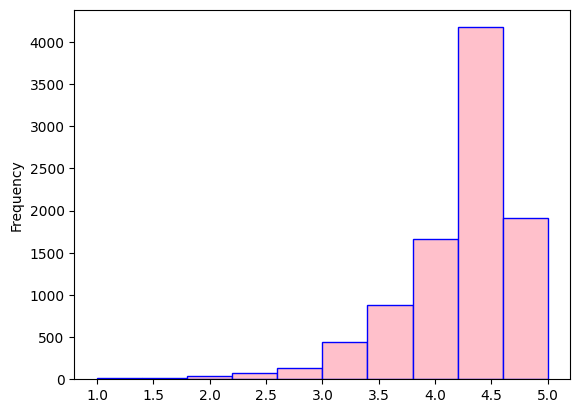

In [89]:
data['Rating'].plot(kind='hist',edgecolor = 'blue',color='pink')

In [88]:
data.shape

(10840, 13)

#### 5.Top categories count.

#### a. Find the total of all categories.

In [ ]:
categ = data.value_counts('Category').reset_index().head()   # here .reset_index() chage that list into data frame
categ

,Category,count
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460


### Bar plot of category wise total.

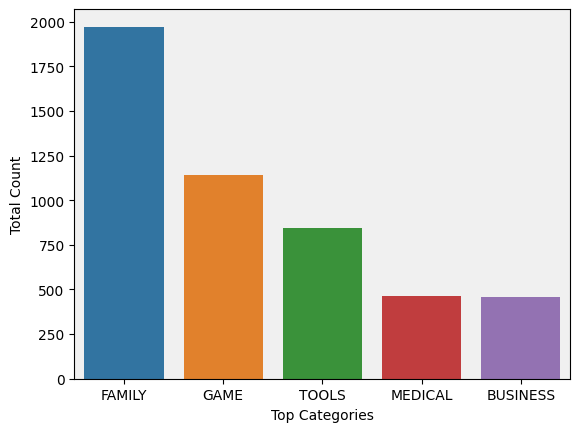

In [103]:
sns.barplot(x='Category',y = 'count',hue= 'Category',data = categ)
plt.xlabel("Top Categories")
plt.ylabel("Total Count")
plt.gca().set_facecolor('#f0f0f0')
plt.show()